<a href="https://colab.research.google.com/github/tjturnage/image_processing/blob/master/batch_crop_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h2><font color="#0000cc"><b><i>This colab allows you to "batch crop" multiple images (all having the same dimensions) so the cropped images are exactly aligned with each other.</i></b></font></h2>


### I'm using [imagemagick](https://imagemagick.org/) and its [command line interface](https://imagemagick.org/script/command-line-processing.php). I prefer the "convert" command instead of "magick" (which you'll see a lot in the documentation) because I want to preserve my original files instead of modifying them in place.


In [6]:
# @title Before you can do anything, you first must install imagemagick.
!apt install imagemagick --quiet

Reading package lists...
Building dependency tree...
Reading state information...
imagemagick is already the newest version (8:6.9.11.60+dfsg-1.3ubuntu0.22.04.3).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.


<hr>

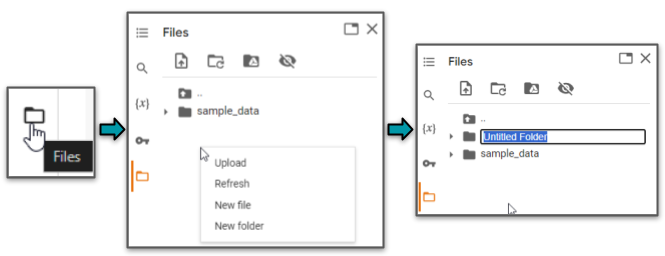

<ol>
<li>Create an images folder in colab ...</li>
<ol>
<li>Click the "Files" icon on the left side of the colab.</li>
<li>In the expanded Files pane that appears, right-click for a pop-up menu and select "New folder".</li>
<li>Rename the new "Untitled Folder" to "images".</li>
</ol>
<li>Drag and drop the images you want to crop into the images folder. You'll get a Warning to "Ensure your files are saved elsewhere". Click OK to proceed.</li>
<li>Determine the area and location you want to crop.</li>

<table>
<tr>
<td><font size="+2">I personally use <a href="https://docs.gimp.org/en/gimp-tool-crop.html" target="_blank">GIMP</a> for this<br> because it's easy to grab<br>the settings you need</a>.</font></td>
<td>
<img src="https://docs.gimp.org/en/images/toolbox/crop-dialog.png" alt="GIMP crop dialog">
</td>
</tr>
</table>

In [3]:
# @title Import the needed software libraries and create a "cropped_images" folder to accompany your images folder.
import os
import glob
import zipfile

try:
  os.chdir('/content/images')
except:
  print("images folder not found! Ensure it's created and your images files are uploaded there.")

src_dir = '/content/images'
#os.makedirs(src_dir, exist_ok=True)

os.makedirs('cropped_images', exist_ok=True)
dst_dir = '/content/cropped_images'


In [4]:
# @title Enter crop settings here...
crop_settings = "192x194+83+83" # @param {type:"string"}

In [11]:
# @title
def resize_image(image_to_resize, resize_amount, run=True):
    """
    see https://imagemagick.org/Usage/resize/ for command line
    examples
    """
    if run:
        resize_command = f"mogrify -resize {resize_amount} {image_to_resize}"
        os.system(resize_command);
        print (f"done resizing {image_to_resize}")
    return

def crop_image(src_path,dst_path,crop_string, run=True):
    """

    """
    command = f"convert -crop {crop_string} +repage {src_path} {dst_path}"
    if run:
        #print(command)
        os.system(command)

    return

"""
image geometry exaplained at:
https://imagemagick.org/script/command-line-processing.php#geometry

Example: 100x200+300+400
px = pixels
The "origin" of the full image (0px,0px) is its upper left (ul) corner.
Going 300 px right and 400 px down takes you to the ul corner of the crop area.
The crop area is 100x200px, so the bottom right corner of this area will be
400px right and 600px down for the top left corner of the full image.

"""
crop_str = crop_settings #'627x822+362+5'
# the glob command works best when you're in the directory
# in which your unedited images live
os.chdir('/content/images')

for src_file in glob.glob('*.png'):
  dest_path = f'/content/cropped_images/cropped_{src_file}'
  crop_image(src_file,dest_path,crop_str)

print("Images cropped ... \n")

os.chdir('/content/')
with zipfile.ZipFile('cropped_images.zip', 'w') as f:
    for file in glob.glob('cropped_images/*'):
        f.write(file)

print('- "cropped_images.zip" file created!\n\n-  Right-click over this file and select Download')



Images cropped ... 

- "cropped_images.zip" file created!

-  Right-click over this file and select Download
